In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [2]:
dfx = pd.read_csv('Diabetes_XTrain.csv')
dfy = pd.read_csv('Diabetes_YTrain.csv')

In [3]:
dfx.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


In [4]:
dfy.head()

,Outcome
0,1
1,0
2,1
3,1
4,0


In [5]:
X_train = dfx.values
Y_train = dfy.values
type(X_train), type(Y_train)

(numpy.ndarray, numpy.ndarray)

In [6]:
class_name, counts = np.unique(Y_train, return_counts=True)
class_name, counts

(array([0, 1]), array([375, 201]))

No handles with labels found to put in legend.


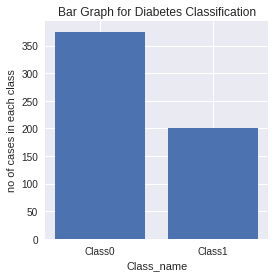

In [7]:
plt.style.use('seaborn')
plt.figure(figsize=(4,4))
plt.bar(x=class_name, height=counts, tick_label=['Class0', 'Class1'])
plt.title('Bar Graph for Diabetes Classification')
plt.xlabel('Class_name')
plt.ylabel('no of cases in each class')
plt.legend()
plt.show()

In [8]:
counts[1]/sum(counts)

0.3489583333333333

- We can see 34.89% people are affected from diabetes.

In [9]:
X_train.shape, Y_train.shape

((576, 8), (576, 1))

In [10]:
# convert Y_train to 1D array
Y_train = Y_train.reshape(576)
X_train.shape, Y_train.shape

((576, 8), (576,))

In [11]:
print(np.sqrt(576))

24.0


- As square root of 576 is 24. So, we can choose k near to 24 as k is best around root(n)

### Implementation:

In [12]:
class knn:
    def __init__(self, k=24):  
        self.k = k
    
    def fit(self, X, y):
        self.X, self.y = X, y
    
    def dist_calc(self, p1, p2):
        return np.sqrt(sum((p1-p2)**2))
    
    def prediction(self, p): 
        dist = []   # list of tuples
        for i in range(len(self.X)):
            dist.append((self.dist_calc(self.X[i],p) , self.y[i]))  #append distances and y label for every pt
            
        dist = sorted(dist)
        dist = dist[:self.k]
        
        dist = np.array(dist) #convert this list of tuples to array
        #dist[0]=array of distances, dist[1]=array of class names for top k nearest points
        new_dist = np.unique(dist[:,1], return_counts=True) #result is tuple
#         new_list has array of y_labels and array of their counts.
        ix = np.argmax(new_dist[1])
        return {"class": int(np.round(new_dist[0][ix])), "prob": new_dist[1][ix]/np.sum(new_dist[1]) }

In [13]:
knn_model = knn(15)
knn_model.fit(X_train, Y_train)

In [14]:
# testing data
df = pd.read_csv('Diabetes_Xtest.csv')
X_test = df.values
type(X_test), X_test.shape

(numpy.ndarray, (192, 8))

In [15]:
knn_model.prediction(X_test[0])

{'class': 0, 'prob': 0.5333333333333333}

In [16]:
classes = []
accuracy = []

for i in range(len(X_test)):
    classes.append(knn_model.prediction(X_test[i])['class'])
    accuracy.append(knn_model.prediction(X_test[i])['prob'])

In [17]:
classes[:10]    # see top 10 classes

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

In [18]:
np.mean(accuracy) # see mean accy=uracy

0.7225694444444444

- This accuracy is the accuracy for the testing data. But we don't know the accuracy about testing data. For eg- If we choose k=1, then accuracy for testing=1. But there is a hige error in training.

In [19]:
df = pd.DataFrame(classes,columns=['Outcome'])  #convert classes list to dataframe
df.head()

,Outcome
0,0
1,0
2,0
3,0
4,0


In [20]:
df.to_csv('output.csv', index=False)

- **Here I got onlt 75% of accuracy when I matched with real testing data of Y_test. This is not 100% because we are given with 7features. But some of these features do not affect much for the diabetes. So, we can remove those columns from our X_train and X_test**.

- accuracy is not very high bcoz knn is not a very strong algorithm. It do not give much accurate results. But if we use some strong algo, then we may get more accurate results